# Related to Figure 4C

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

df = pd.read_csv('/data/yuchen_data/Stereo_seq/All_Figures/version2/Figure4/1.data/Kegg_addmodulescore.txt', index_col=0, sep='\t')
all_pathways = df.columns[-85:]

In [3]:
df = df[['TLS_raw'] + list(all_pathways)]

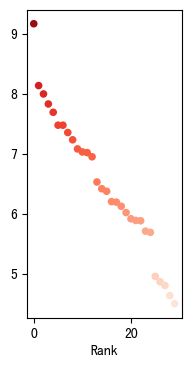

In [4]:
df_tls = df.groupby('TLS_raw').agg('mean')[all_pathways]

# df_group = pd.read_csv('/data1/yuchen/BGI_liver_cancer/4.FinalAnalysis/6.Cell.Reclustering/1.All_sample_Bcells/version7.SPRING/4.Fixed_Result/TLS_group.1125.txt', index_col=0, sep='\t')
# df_group = df_group[df_group['Group'].isin(['Mature', 'NotMature'])]
# dic_group = dict(zip(df_group.index, df_group['Group']))

# df_tls['group'] = df_tls.index.map(dic_group)
# df_tls = df_tls.loc[~df_tls.group.isna(), ]

df_meta = pd.read_csv('/data/yuchen_data/Stereo_seq/All_Figures/version2/metadata_merge.txt', index_col=0, sep='\t')
df_meta = df_meta.loc[~df_meta['TLS_raw'].str.endswith('_NA'), ]
dic_group = dict(zip(df_meta['TLS_raw'], df_meta['TLS_maturity']))

df_tls['group'] = df_tls.index.map(dic_group)
g0 = df_tls['Tryptophan metabolism'][df_tls['group']=='Mature']
g1 = df_tls['Tryptophan metabolism'][df_tls['group']=='Deviating']

# 计算p值和差值
df_rst = pd.DataFrame(index=['p', 'diff', 'mature', 'immature'])
for pathway in all_pathways:
    g0 = df_tls[pathway][df_tls['group']=='Mature']
    g1 = df_tls[pathway][df_tls['group']=='Deviating']
    p = ttest_ind(g0, g1)[1]
    diff = g1.mean() - g0.mean()
    cur_v = [p, diff, g0.mean(), g1.mean()]
    df_rst[pathway] = cur_v
df_rst = df_rst.T


df_rst = df_rst[(df_rst['p'] < 0.001) & (df_rst['diff'] > 0)]
df_rst = df_rst.sort_values('p')
df_rst['-log10(p-value)'] = -np.log10(df_rst['p'])
df_rst['x'] = range(df_rst.shape[0])

df_rst = df_rst.iloc[:30, ]

from mycolorpy import colorlist as mcp
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
colors = mcp.gen_color(cmap="Reds",n=20)[2:18]
my_cmap = LinearSegmentedColormap.from_list("mycmap", colors)

plt.figure(figsize=(2, 4))
plt.scatter(x=df_rst['x'], y=df_rst['-log10(p-value)'], linewidth=0, s=30, c=df_rst['-log10(p-value)'], cmap=my_cmap)
plt.xlabel('Rank')
plt.show()

In [5]:
df_rst

,p,diff,mature,immature,-log10(p-value),x
Tryptophan metabolism,6.833659e-10,0.039011,-0.056523,-0.017512,9.165347,0
Steroid hormone biosynthesis,7.301586e-09,0.036446,-0.035611,0.000835,8.136583,1
Retinol metabolism,1.006446e-08,0.063052,-0.045923,0.017129,7.997210,2
Metabolism of xenobiotics by cytochrome P450,1.477762e-08,0.057440,-0.033362,0.024078,7.830395,3
Drug metabolism - cytochrome P450,2.032418e-08,0.065615,-0.036036,0.029579,7.691987,4
Porphyrin and chlorophyll metabolism,3.332117e-08,0.024993,-0.025683,-0.000690,7.477280,5
Drug metabolism - other enzymes,3.332502e-08,0.025899,-0.014247,0.011652,7.477230,6
Fatty acid degradation,4.410424e-08,0.064440,-0.066092,-0.001652,7.355520,7
Ascorbate and aldarate metabolism,5.830151e-08,0.038800,-0.041191,-0.002390,7.234320,8
Tyrosine metabolism,8.261127e-08,0.062206,-0.058970,0.003236,7.082961,9
